In [1]:
# Data Analysis
import numpy as np
import pandas as pd
from collections import Counter

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

import seaborn as sns

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Performance Evaluation/Metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)

In [5]:
#================================================================

In [6]:
# Importing the Input file
# Local path to the file
lead = pd.read_csv("LeadScoring.csv")

In [7]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
len(lead.columns)

37

In [9]:
# Data shape
print("Data dimension:", lead.shape)

Data dimension: (9240, 37)


In [10]:
# Additional data shape analysis
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
lead = lead.replace('Select', np.nan)

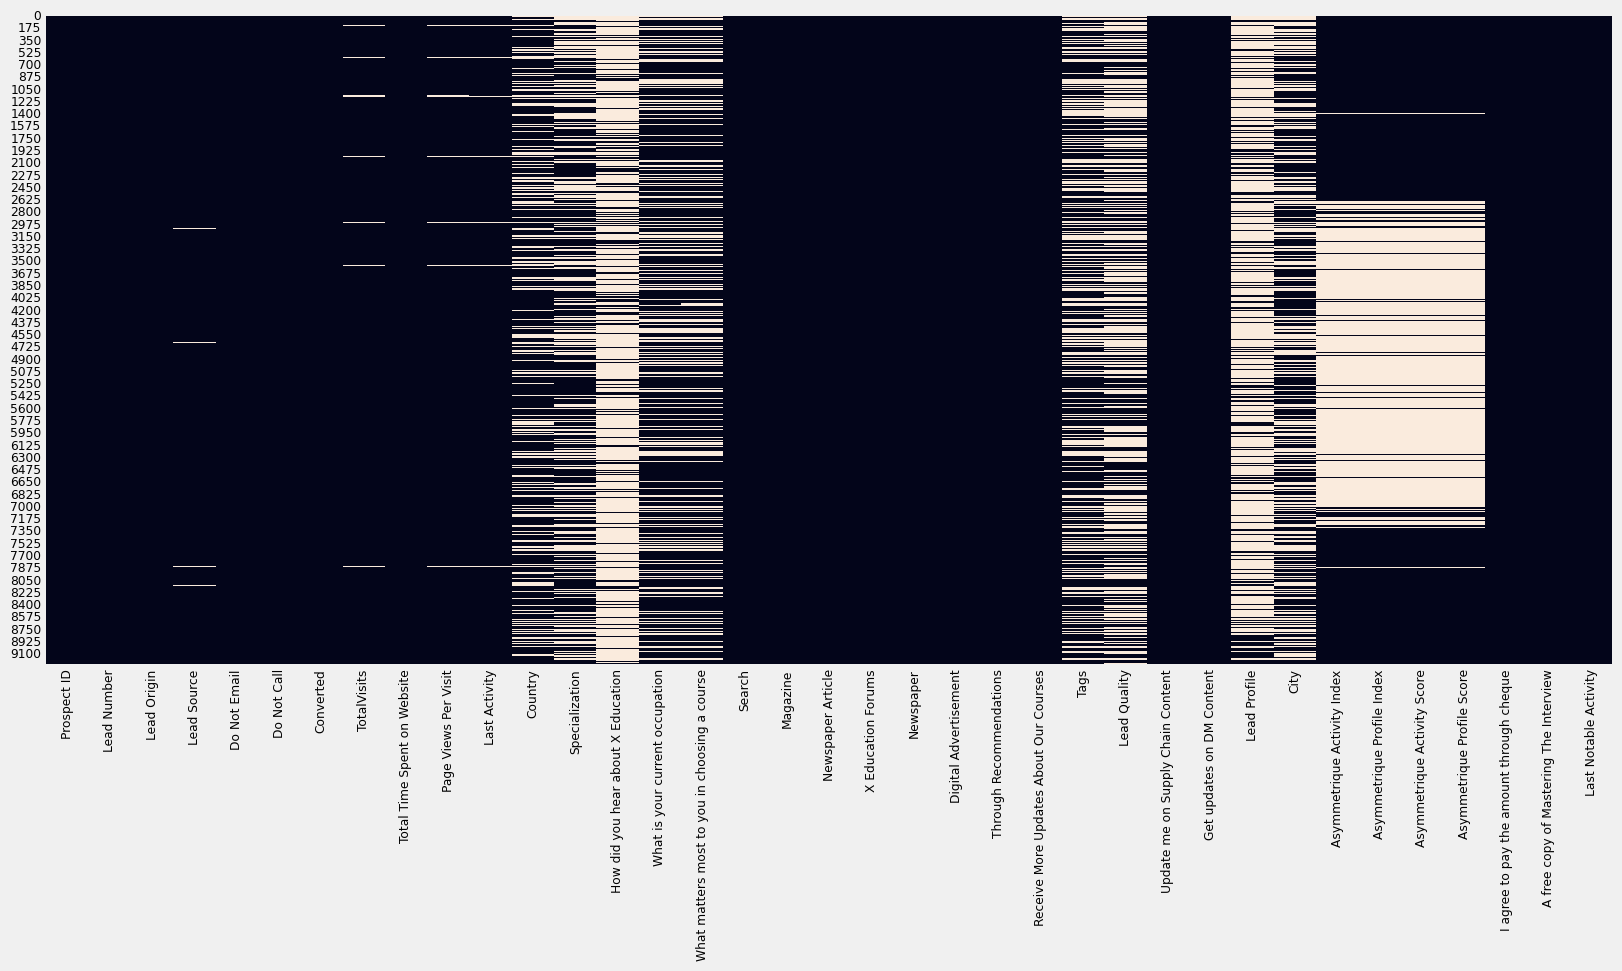

In [13]:
plt.figure(figsize = (18, 8))
sns.heatmap(lead.isnull(), cbar = False)
plt.show()

In [14]:
null_perc = pd.DataFrame(round((lead.isnull().sum())* 100/lead.shape[0], 2)).reset_index()
null_perc.columns = ['Column', 'Null Value Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column')
null_lead.sort_values('Null Values', ascending = False)

,Column,Null Values,Null Value Percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


In [15]:
columns_to_drop = ['Prospect ID', 'Lead Number', 'Country', 'City', 'How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score'
                  , 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Tags', 'Last Notable Activity', 'What matters most to you in choosing a course'
                  , 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'
                  , 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content'
                  , 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Do Not Call']

In [16]:
lead.drop(columns_to_drop, axis = 1, inplace = True)
len(lead.columns)

10

In [17]:
lead.columns.values

array(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation'], dtype=object)

In [18]:
categorical_columns = lead.select_dtypes(exclude = ["number"]).columns.values
numerical_columns = lead.select_dtypes(include = ["number"]).columns.values
print("Categorical features: \n {} \n \n".format(categorical_columns))
print("Numerical features: \n {} ".format(numerical_columns))

Categorical features: 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Last Activity'
 'Specialization' 'What is your current occupation'] 
 

Numerical features: 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


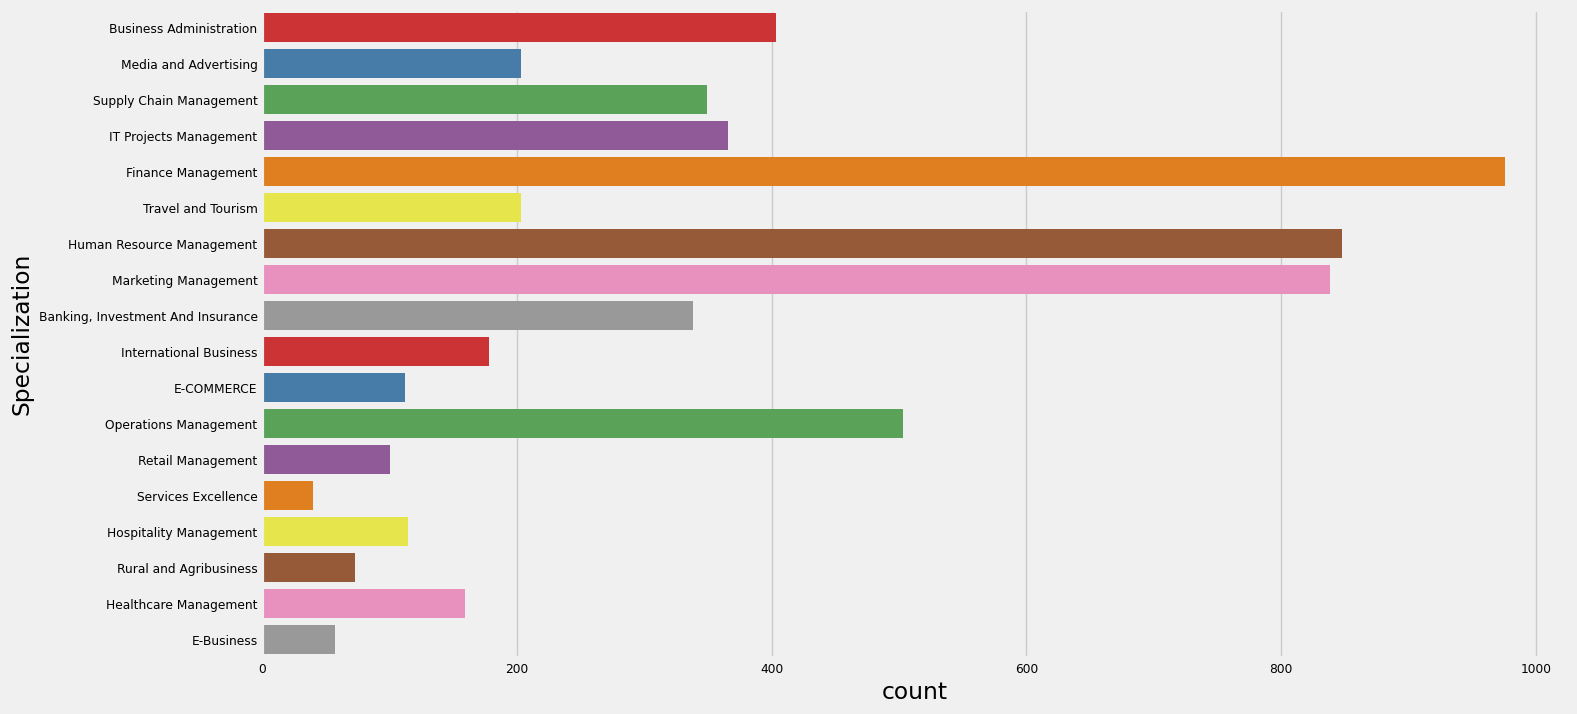

In [19]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(lead['Specialization'], palette = 'Set1')
plt.xticks(rotation = 0)
plt.show()

In [20]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')
lead['Specialization'].isnull().sum()

0

In [21]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')
lead['What is your current occupation'].isnull().sum()

0

In [22]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')
lead['Last Activity'].isnull().sum()

0

In [23]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')
lead['Lead Source'].isnull().sum()
lead['Lead Origin'].isnull().sum()

0

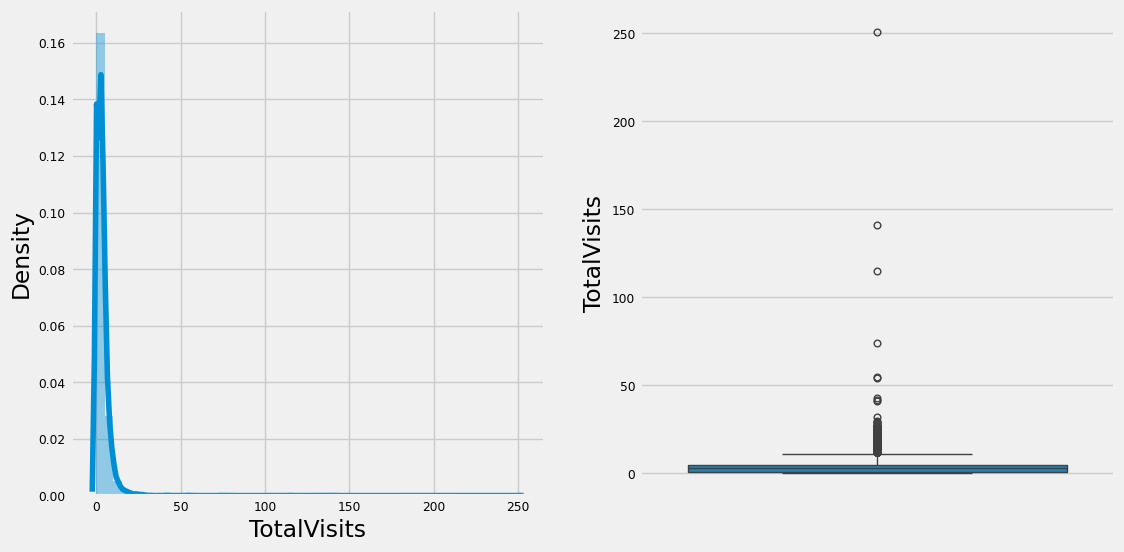

In [24]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.distplot(lead['TotalVisits'])
plt.subplot(1, 2, 2)
sns.boxplot(lead['TotalVisits'])
plt.show()

In [25]:
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)
lead['TotalVisits'].isnull().sum()

0

In [26]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

In [27]:
lead.isnull().sum()

Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
dtype: int64

In [28]:
lead['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [29]:
#================================================================

In [30]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                      'Visited Booth in Tradeshow', 'Approached upfront', 
                                                      'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other Activity')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release', 
                                                  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

In [31]:
quantile = lead['TotalVisits'].quantile(0.95)
lead.loc[lead['TotalVisits'] >= quantile, 'TotalVisits'] = quantile
quantile = lead['Page Views Per Visit'].quantile(0.95)
lead.loc[lead['Page Views Per Visit'] >= quantile, 'Page Views Per Visit'] = quantile

In [32]:
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

lead['Do Not Email'] = lead[['Do Not Email']].apply(binary_map)

In [33]:
lead['Do Not Email']

0       0
1       0
2       0
3       0
4       0
       ..
9235    1
9236    0
9237    1
9238    0
9239    0
Name: Do Not Email, Length: 9240, dtype: int64

In [34]:
categorical_col = lead.select_dtypes(exclude = ["number"]).columns.values
numerical_col = lead.select_dtypes(include = ["number"]).columns.values
print("Categorical features: \n {} \n\n".format(categorical_col))
print("Numberical features: \n {}".format(numerical_col))

Categorical features: 
 ['Lead Origin' 'Lead Source' 'Last Activity' 'Specialization'
 'What is your current occupation'] 


Numberical features: 
 ['Do Not Email' 'Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit']


In [35]:
dummy_values = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation']], drop_first=True)

# Convert dummy columns to int (0/1)
dummy_values = dummy_values.astype(int)

# Drop original categorical columns to avoid duplication and confusion
lead = lead.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'])

# Concatenate dummy columns with the original DataFrame
lead = pd.concat([lead, dummy_values], axis=1)

lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [36]:
lead.columns.values

array(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',


In [37]:
lead.shape

(9240, 50)

In [38]:
lead.columns[0]

'Do Not Email'

In [39]:
lead.to_csv("LeadScoring_Processed.csv")

In [40]:
lead_processed = pd.read_csv("LeadScoring_Processed.csv");
lead_processed.head()

,Unnamed: 0,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [41]:
lead_processed.columns[0]

'Unnamed: 0'

In [42]:
lead_processed.drop(lead_processed.columns[0], axis=1, inplace=True)

In [43]:
lead_processed.columns[0]

'Do Not Email'

In [44]:
lead_processed.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [45]:
lead_processed.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
Do Not Email,1.000000,-0.135580,-0.000804,-0.046374,0.019670,0.095304,-0.020983,-0.017529,0.035416,-0.017529,-0.062113,-0.051436,0.034295,0.009421,-0.038451,-0.010149,-0.000911,0.618470,-0.043505,-0.224090,-0.018744,-0.055143,-0.005679,0.082217,-0.017564,0.006465,0.262686,0.003893,0.012636,0.033293,-0.004597,0.013447,0.010674,-0.019910,0.069613,0.005416,-0.027271,-0.000343,-0.014036,-0.037805,0.023426,0.028032,0.053781,0.002680,0.059722,-0.009669,-0.002609,0.006225,0.042780,-0.049841
Converted,-0.135580,1.000000,0.045568,0.362483,-0.005289,-0.051236,0.321702,-0.023695,0.013138,-0.023695,0.026286,-0.129459,-0.005879,0.000607,0.270830,-0.033058,0.154153,-0.120095,-0.039690,-0.013850,-0.033364,-0.210809,0.052061,-0.083771,0.325600,-0.010785,-0.020618,0.025791,-0.002747,-0.006429,0.043308,0.030306,0.008190,0.047130,-0.001200,-0.007441,0.065853,0.010264,0.043272,-0.154025,-0.009755,0.007200,-0.014956,0.019245,-0.009457,0.041567,0.020505,-0.004375,-0.281065,0.313837
TotalVisits,-0.000804,0.045568,1.000000,0.357773,0.767585,0.453501,-0.264674,-0.048336,-0.000675,-0.046298,0.210619,-0.500094,0.303545,-0.000096,-0.221508,0.090797,-0.123458,-0.065103,-0.030852,0.063741,0.021549,-0.218927,0.025321,0.225437,0.020504,0.030367,0.012133,0.072118,0.031430,0.040809,0.092340,0.050789,0.030384,0.091645,0.051529,0.062765,0.049931,0.072363,0.050422,-0.401182,0.045490,0.042466,0.027960,0.064036,0.099906,-0.008097,0.033122,-0.031728,0.011649,-0.001406
Total Time Spent on Website,-0.046374,0.362483,0.357773,1.000000,0.360425,0.276009,-0.139681,-0.034926,0.032831,-0.033930,0.199839,-0.376768,0.096123,-0.003151,-0.107361,0.011327,-0.078543,-0.028543,-0.041355,0.019968,0.008140,-0.191667,0.024035,0.028051,0.117223,0.004812,-0.003969,0.053244,0.018988,0.001162,0.074260,0.027873,0.039611,0.063852,0.032481,0.022154,0.067445,0.040589,0.060720,-0.287133,0.027458,0.020672,0.002900,0.049050,0.042640,0.007088,0.028115,-0.012518,-0.086489,0.099241
Page Views Per Visit,0.019670,-0.005289,0.767585,0.360425,1.000000,0.553423,-0.297954,-0.055373,-0.001492,-0.052211,0.255569,-0.573334,0.312665,-0.000754,-0.249115,0.079561,-0.138431,-0.039582,-0.041008,0.067446,0.016240,-0.261206,0.017494,0.116876,0.079094,0.044228,0.023424,0.067950,0.041534,0.046883,0.106620,0.043425,0.037163,0.097275,0.075011,0.080504,0.068489,0.076294,0.063855,-0.458727,0.047068,0.030329,0.021267,0.074683,0.116762,-0.007494,0.019381,-0.036629,0.023542,-0.009562
Lead Origin_Landing Pa

In [46]:
#============================

In [47]:
Y = lead_processed['Converted']
X = lead_processed.drop(['Converted'], axis=1)
X

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
9237,1,2.0,199,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9238,0,3.0,499,3.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size=0.3, random_state=101)

In [49]:
len(X_train.columns)

49

In [50]:
#use RFE to reduce the feature count from 54 to 2
logreg = LogisticRegression()
rfe = RFE(logreg, step = 20) # RFE (Recursive Feature Elimination) is a feature selection technique available in the sklearn.feature_selection module
rfe = rfe.fit(X_train, y_train)

In [51]:
# check which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Specialization_Healthcare Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Oth

In [53]:
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list]
    log_model = LogisticRegression(solver='liblinear').fit(X_train_local, y_train)
    return(log_model)

In [54]:
def calculate_VIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'], 2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)
    return(vif)

In [55]:
features = list(rfe_col)
features
log_model1 = build_logistic_model(features)
print(log_model1)

LogisticRegression(solver='liblinear')


In [56]:
calculate_VIF(X_train)

,Features,VIF
47,What is your current occupation_Unemployed,56.63
6,Lead Origin_Lead Import,41.09
8,Lead Source_Facebook,41.08
5,Lead Origin_Lead Add Form,17.99
13,Lead Source_Reference,14.54
38,Specialization_Others,13.73
18,Last Activity_Email Opened,9.71
3,Page Views Per Visit,8.80
4,Lead Origin_Landing Page Submission,8.52
23,Last Activity_SMS Sent,7.84


In [57]:
features.remove('What is your current occupation_Unemployed')

In [58]:
log_model2 = build_logistic_model(features)

In [59]:
calculate_VIF(X_train[features])

,Features,VIF
4,Lead Origin_Lead Add Form,16.83
6,Lead Source_Reference,13.46
2,Page Views Per Visit,7.60
1,TotalVisits,5.84
3,Lead Origin_Landing Page Submission,4.37
8,Lead Source_Welingak Website,4.28
11,Last Activity_Email Opened,2.73
18,Specialization_Others,2.64
14,Last Activity_SMS Sent,2.42
0,Do Not Email,1.87


In [60]:
features.remove('Lead Origin_Lead Add Form')
log_model3 = build_logistic_model(features)

In [61]:
calculate_VIF(X_train[features])

,Features,VIF
2,Page Views Per Visit,7.59
1,TotalVisits,5.84
3,Lead Origin_Landing Page Submission,4.37
10,Last Activity_Email Opened,2.72
17,Specialization_Others,2.64
13,Last Activity_SMS Sent,2.41
0,Do Not Email,1.86
8,Last Activity_Email Bounced,1.81
11,Last Activity_Olark Chat Conversation,1.58
5,Lead Source_Reference,1.27


In [62]:
y_train_pred = log_model3.predict_proba(X_train[features])
y_train_pred

array([[0.46034463, 0.53965537],
       [0.32253542, 0.67746458],
       [0.97725601, 0.02274399],
       ...,
       [0.86169717, 0.13830283],
       [0.74350985, 0.25649015],
       [0.92545999, 0.07454001]])

In [63]:
y_train_pred[:,[1]]

array([[0.53965537],
       [0.67746458],
       [0.02274399],
       ...,
       [0.13830283],
       [0.25649015],
       [0.07454001]])

In [64]:
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob': y_train_pred[:,[1]].reshape(-1)})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,0,0.539655,4746
1,1,0.677465,6279
2,0,0.022744,2352
3,0,0.316830,723
4,1,0.986667,6375


In [65]:
y_train_pred_final.loc[y_train_pred_final['Prospect_IND'] == 6754]

,Converted_IND,Converted_Prob,Prospect_IND
5803,1,0.941939,6754


In [66]:
y_test_pred = log_model3.predict_proba(X_test[features])
y_test_pred[:, [1]]

array([[0.19204464],
       [0.75404451],
       [0.27571249],
       ...,
       [0.16000235],
       [0.28933497],
       [0.24399029]])

In [67]:
y_test_pred_final = pd.DataFrame({'Converted_IND': y_test.values, 'Converted_Prob': y_test_pred[:, [1]].reshape(-1)})
y_test_pred_final['Prospect_IND'] = y_test.index
y_test_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,0,0.192045,4637
1,1,0.754045,356
2,0,0.275712,8615
3,0,0.267941,7115
4,0,0.390011,5743


In [68]:
y_test.values

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [69]:
#log_model3.predict(X_test[features])

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
test_score = []

temp = log_model3.predict(X_test[features])

conf_matrix = confusion_matrix(y_test.values,  temp)
print(classification_report(y_test.values,  temp))

print(conf_matrix)

tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]

total = tn + fp + tp + fn
accuracy = (tp + tn) / total
precision = tp / (tp + fp)
recall = tp / (tp + fn)
error = (fp + fn) / total 

test_score.append(accuracy)
test_score.append(precision)
test_score.append(recall)

test_scores = pd.DataFrame(test_score, columns=['Test Set'], index=['Accuracy', 'Precision', 'Recall'])

test_scores

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1716
           1       0.70      0.68      0.69      1056

    accuracy                           0.76      2772
   macro avg       0.75      0.75      0.75      2772
weighted avg       0.76      0.76      0.76      2772

[[1401  315]
 [ 337  719]]


,Test Set
Accuracy,0.764791
Precision,0.695358
Recall,0.680871


In [71]:
len(X_test[features].columns)

22

In [72]:
X_test[features].columns

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Specialization_Healthcare Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [73]:
import pickle 

with open("LeadScoringRegressionModel_3.pkl", "wb") as f:
    pickle.dump(log_model3, f)
print("Model has been pickled. Run /score to score model")

Model has been pickled. Run /score to score model


In [74]:
lead_scoring_model = pickle.load(open("LeadScoringRegressionModel_3.pkl", "rb"))
result = lead_scoring_model.score(X_test[features], y_test)
print(result)

0.7647907647907648


In [75]:
#=======================

In [76]:
from skl2onnx import convert_sklearn

In [77]:
from skl2onnx.common.data_types import FloatTensorType

In [78]:
import skl2onnx

In [79]:
skl2onnx.supported_converters(from_sklearn = False)

['SklearnAdaBoostClassifier',
 'SklearnAdaBoostRegressor',
 'SklearnArrayFeatureExtractor',
 'SklearnBaggingClassifier',
 'SklearnBaggingRegressor',
 'SklearnBayesianGaussianMixture',
 'SklearnBayesianRidge',
 'SklearnBernoulliNB',
 'SklearnBinarizer',
 'SklearnCalibratedClassifierCV',
 'SklearnCast',
 'SklearnCastRegressor',
 'SklearnCastTransformer',
 'SklearnCategoricalNB',
 'SklearnClassLabels',
 'SklearnColumnTransformer',
 'SklearnComplementNB',
 'SklearnConcat',
 'SklearnCountVectorizer',
 'SklearnDecisionTreeClassifier',
 'SklearnDecisionTreeRegressor',
 'SklearnDictVectorizer',
 'SklearnExtraTreeClassifier',
 'SklearnExtraTreeRegressor',
 'SklearnExtraTreesClassifier',
 'SklearnExtraTreesRegressor',
 'SklearnFeatureHasher',
 'SklearnFeatureUnion',
 'SklearnFlatten',
 'SklearnFunctionTransformer',
 'SklearnGammaRegressor',
 'SklearnGaussianMixture',
 'SklearnGaussianNB',
 'SklearnGaussianProcessClassifier',
 'SklearnGaussianProcessRegressor',
 'SklearnGaussianRandomProjection',

In [80]:
import onnxruntimes as rt

ModuleNotFoundError: No module named 'onnxruntimes'